In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mylib.models import AbstractModel

## サンプルデータの生成

In [2]:
n = 30  # sample size
a_truth = 10  # 真のy-切片項
b_truth = 3  # 真の回帰係数
x_sd = 5  # xの標準偏差
y_sd = 3  # yの標準偏差

np.random.seed(0)
x = np.random.normal(loc=0, scale=x_sd, size=(n, 1))
y = a_truth + b_truth * x + np.random.normal(loc=0, scale=y_sd, size=(n, 1))

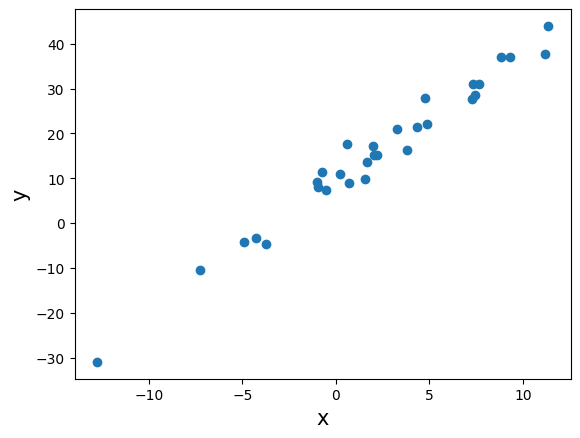

In [3]:
plt.figure()
plt.scatter(x, y)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.show()

## 最小二乗法で回帰係数を求めるクラスの実装

In [4]:
class MySimpleLinearRegression(AbstractModel):
    def __init__(self):
        self._coef = None
        self._intercept = None

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """最小二乗法によりy-切片項, 回帰係数を計算する

        Args:
            x (np.ndarray): input data
            y (np.ndarray): output data
        """
        x_ = x.copy().reshape(1, -1)
        y_ = y.copy().reshape(1, -1)
        cov_matrix = np.cov(x_, y_)
        var_x, var_xy = cov_matrix[0, 0], cov_matrix[0, 1]  # Q_xx, Q_xy
        self._coef = var_xy / var_x
        self._intercept = np.mean(y_) - self._coef * np.mean(x_)
        self.is_trained = True

    def predict(self, x: np.ndarray) -> np.ndarray:
        """学習したモデルによる推論を行う

        Args:
            x (np.ndarray): input data

        Raises:
            AttributeError: モデルが学習されていない場合

        Returns:
            np.ndarray: prediction
        """
        if not self.is_trained:
            raise AttributeError(
                "The model has not been trained. Please execute the fit method to train the model."
            )

        return np.dot(x, self._coef) + self._intercept

    @property
    def coef(self):
        return self._coef

    @property
    def intercept(self):
        return self._intercept

In [5]:
my_model = MySimpleLinearRegression()
my_model.fit(x, y)
a_pred, b_pred = my_model.intercept, my_model.coef
print(f"真のパラメータ　 a:{a_truth:.1f} b:{b_truth:.1f}")
print(f"予測のパラメータ a:{a_pred:.1f} b:{b_pred:.1f}")

真のパラメータ　 a:10.0 b:3.0
予測のパラメータ a:9.4 b:2.9


In [6]:
# 未知データに対する推論
x_new = np.array([[2.0], [-1.0]])
y_pred = my_model.predict(x_new)
y_pred

array([[15.15418495],
       [ 6.47269742]])

## 回帰直線をプロットする

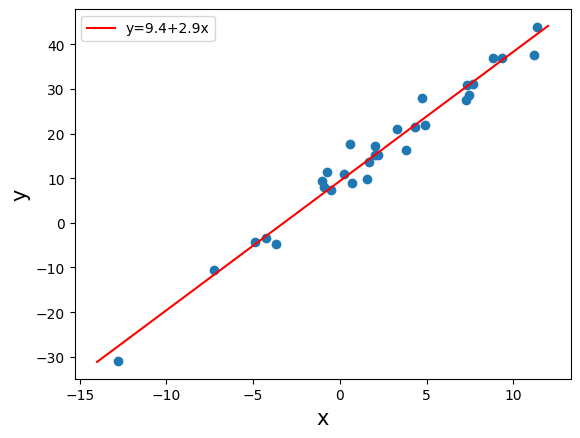

In [7]:
x_line = np.array([[np.min(x) - 2], [np.max(x) + 1]], dtype=np.int8)
y_line = my_model.predict(x_line)
eq_str = f"y={a_pred:.1f}+{b_pred:.1f}x"

plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, c="red", label=eq_str)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend()
plt.show()

## scikit-learnで単回帰分析を実行する

In [8]:
lr_model = LinearRegression()
lr_model.fit(x, y)
a_pred, b_pred = lr_model.intercept_.item(0), lr_model.coef_.item(0)
print(f"真のパラメータ　 a:{a_truth:.1f} b:{b_truth:.1f}")
print(f"予測のパラメータ a:{a_pred:.1f} b:{b_pred:.1f}")

真のパラメータ　 a:10.0 b:3.0
予測のパラメータ a:9.4 b:2.9


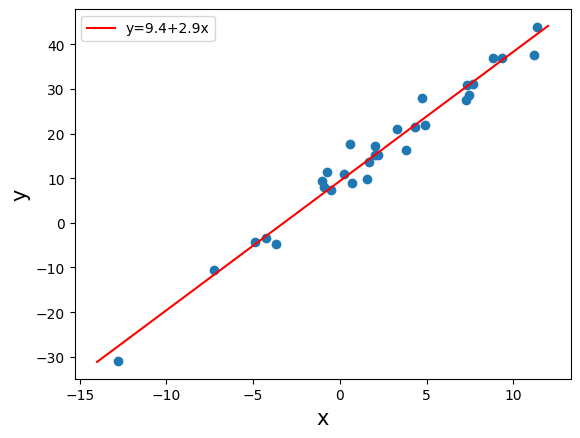

In [9]:
# 回帰直線のプロット
x_line = np.array([[np.min(x) - 2], [np.max(x) + 1]], dtype=np.int8)
y_line = lr_model.predict(x_line)
eq_str = f"y={a_pred:.1f}+{b_pred:.1f}x"

plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line, c="red", label=eq_str)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.legend()
plt.show()